# Chicago Red Light Ticket Data Processing
* raw data downloaded from Propublica Illinois (https://www.propublica.org/datastore/dataset/chicago-parking-ticket-data)
* 2003-11 to 2018-05 data, only used 2014-03 to 2018-04 data after review

### Set up dependencies

In [1]:
%matplotlib inline

# Set up dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# file to read (not on GitHub)
csv_file = "chicago_camera_tickets.csv"

### Check the first 1000 rows of data

In [2]:
# Read first 100 rows of file to check dtype
df_tmp = pd.read_csv(csv_file, nrows=1000, infer_datetime_format=True)
df_tmp.dtypes

ticket_number              int64
issue_date                object
violation_location        object
license_plate_number      object
license_plate_state       object
license_plate_type        object
zipcode                  float64
violation_code             int64
violation_description     object
unit                      object
unit_description          object
vehicle_make              object
fine_level1_amount         int64
fine_level2_amount         int64
current_amount_due       float64
total_payments           float64
ticket_queue              object
ticket_queue_date         object
notice_level              object
notice_number              int64
hearing_disposition       object
officer                   object
year                       int64
month                      int64
hour                       int64
dtype: object

### Read entire csv (may take more than 1 minute)

In [3]:
# Turn dtype to dictionary when reading in entire dataset
df_dtypes = df_tmp.dtypes.apply(lambda x: x.name).to_dict()

# Manual override to dtypes
df_dtypes['zipcode'] = 'object'
df_dtypes['violation_code'] = 'object'

# Set date columns to datetime type
df_parse_dates = ['issue_date', 'ticket_queue_date']

# Read the entire csv
df = pd.read_csv("chicago_camera_tickets.csv", dtype=df_dtypes, parse_dates=df_parse_dates)
df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,hearing_disposition,officer,year,month,hour
0,7000004200,2003-11-01 01:04:00,5500 S WESTERN AVE S,b2788131d1b468696d79acbdfd982fb062bde81849979b...,IL,PAS,60629,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-01,VIOL,5046678160,NaN,RDFX,2003,11,1
1,7000004142,2003-11-01 01:35:00,2400 W 55TH STREET E,aa4fcfe3c1a588b5a3764da26cae2cc6feb59a23cef7d5...,IL,TMP,60632,9102020,RED LIGHT VIOLATION,RDFX,...,190.0,Paid,2008-05-15,FINL,5046550880,NaN,RDFX,2003,11,1
2,7000004143,2003-11-01 02:41:00,2400 W 55TH STREET E,ce3f1e6bf33c407041a9d7adc4246352025e2281900fbe...,IL,PAS,62901,9102020,RED LIGHT VIOLATION,RDFX,...,180.0,Paid,2010-02-19,SEIZ,5108042770,NaN,RDFX,2003,11,2
3,7000004144,2003-11-01 05:04:00,2400 W 55TH STREET E,a5abd5e2aa1c0cee5a390d894286798dbf39689fa3db01...,IL,PAS,60638,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-15,DETR,5046447510,NaN,RDFX,2003,11,5
4,7000004145,2003-11-01 06:40:00,2400 W 55TH STREET E,565b2e2b7d0cc723a79d6546158cd60ec4dc53e34d0a69...,IL,PAS,60632,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-16,DETR,5046550890,NaN,RDFX,2003,11,6


In [4]:
df.count()

ticket_number            11557497
issue_date               11557497
violation_location       11557497
license_plate_number     11557497
license_plate_state      11557497
license_plate_type       11557497
zipcode                  11555178
violation_code           11557497
violation_description    11557497
unit                     11557497
unit_description         11557497
vehicle_make             11557497
fine_level1_amount       11557497
fine_level2_amount       11557497
current_amount_due       11557497
total_payments           11557497
ticket_queue             11557497
ticket_queue_date        11557497
notice_level              9276814
notice_number            11557497
hearing_disposition        460167
officer                  11557497
year                     11557497
month                    11557497
hour                     11557497
dtype: int64

In [5]:
df.dtypes

ticket_number                     int64
issue_date               datetime64[ns]
violation_location               object
license_plate_number             object
license_plate_state              object
license_plate_type               object
zipcode                          object
violation_code                   object
violation_description            object
unit                             object
unit_description                 object
vehicle_make                     object
fine_level1_amount                int64
fine_level2_amount                int64
current_amount_due              float64
total_payments                  float64
ticket_queue                     object
ticket_queue_date        datetime64[ns]
notice_level                     object
notice_number                     int64
hearing_disposition              object
officer                          object
year                              int64
month                             int64
hour                              int64


### Data Cleaning

In [6]:
# Data Fixing: data between noon and 1 pm are populated '24' in hour field
df.loc[df['hour']==24,'hour'] = 12

## Total Ticket Count
### Group data by date

In [7]:
# Add 'date' field
df['date'] = df['issue_date'].dt.date

# group by date and count total
count_day = df.groupby('date')[['issue_date']].count()
count_day.columns = ['Daily Total']

# save to csv
count_day.to_csv('Chicago_DayCountAll.csv')
count_day

,Daily Total
date,
2003-11-01,46
2003-11-02,31
2003-11-03,69
2003-11-04,57
2003-11-05,56
...,...
2018-04-29,190
2018-04-30,797
2018-05-01,60


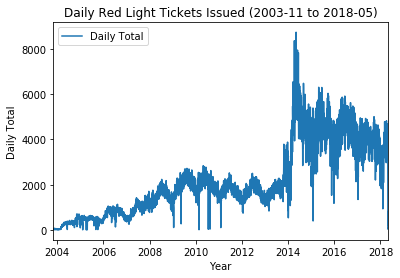

In [8]:
# plot data by date
count_day.plot()
plt.title('Daily Red Light Tickets Issued (2003-11 to 2018-05)')
plt.xlabel('Year')
plt.ylabel("Daily Total")
plt.savefig('DailyTotal.png')
plt.show()

### Limit to 2014 - 2018 data for analysis
* Start at March 2014 because ticket count is much higher afterwards
* it coincided with the time with new vendor managing the program and reports of lowering the threshold for yellow light times

In [9]:
start_date = datetime(2014, 3, 1)
end_date = datetime(2018, 4, 27)
tix_20142018 = df.loc[(df['issue_date'] >= start_date)
                     & (df['issue_date'] <= (end_date + timedelta(days=1)))]
print(f"Number of data points: {len(tix_20142018)}")

Number of data points: 6633407


### Group data by date

In [10]:
count_day = tix_20142018.groupby('date')[['issue_date']].count()
count_day.columns = ['Daily Total']

# save to csv
count_day.to_csv('Chicago_DayCount.csv')

### Group data by month

In [11]:
# daily count
count_month_date = tix_20142018.groupby(['date','month'])[['issue_date']].count()

# total and daily avg by month
count_month = count_month_date.groupby('month').agg(['sum', 'mean'])
count_month.columns = ['Total', 'Daily Avg']
count_month['Percent'] = count_month['Daily Avg'] / count_month['Daily Avg'].sum() * 100

# save to csv
count_month.to_csv('Chicago_MonthCount.csv')

count_month

,Total,Daily Avg,Percent
month,,,
1,425483,3431.314516,6.560826
2,410798,3635.380531,6.951009
3,672227,4336.948387,8.292438
4,673053,4547.655405,8.695319
5,652615,5263.024194,10.063136
6,588940,4907.833333,9.383995
7,592272,4776.387097,9.132664
8,515051,4153.637097,7.941939
9,571522,4762.683333,9.106462


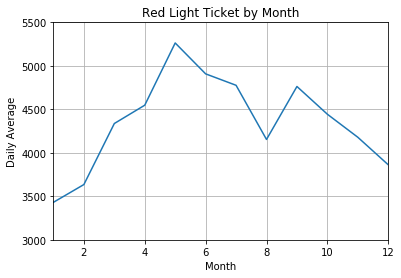

In [12]:
# plot data
count_month['Daily Avg'].plot()
plt.title("Red Light Ticket by Month")
plt.ylim(3000,5500)
plt.xlabel("Month")
plt.ylabel("Daily Average")
plt.grid()
plt.savefig("DailyAvgByMonth.png")
plt.show()

### Group data by hour

In [13]:
count_hour = tix_20142018.groupby('hour')[['issue_date']].count()
count_hour.columns = ['Total']
count_hour['Daily Avg'] = count_hour['Total'] / ((end_date - start_date).days + 1)
count_hour['Percent'] = count_hour['Total'] / count_hour['Total'].sum() * 100

# save to csv
count_hour.to_csv('Chicago_HourCount.csv')
count_hour

,Total,Daily Avg,Percent
hour,,,
0,49397,32.519421,0.744670
1,42034,27.672153,0.633671
2,37291,24.549704,0.562170
3,28632,18.849243,0.431633
4,28327,18.648453,0.427035
5,37439,24.647136,0.564401
6,217900,143.449638,3.284888
7,339930,223.785385,5.124516
8,411649,271.000000,6.205695


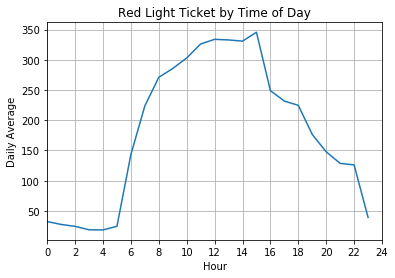

In [14]:
# plot data
count_hour['Daily Avg'].plot()
plt.title("Red Light Ticket by Time of Day")
plt.xlabel("Hour")
plt.ylabel("Daily Average")
plt.xticks(np.arange(0,26,2))
plt.grid()
plt.savefig("DailyAvgByHour.png")
plt.show()

## Ticket Count by Addresses

In [15]:
count_location = pd.DataFrame(tix_20142018['violation_location'].value_counts())
count_location.index.name = 'address'
count_location.columns = ['Total']
count_location.to_csv('Chicago_Count_by_Location.csv')

In [16]:
count_location

,Total
address,
4909 N CICERO AVE,255172
445 W 127TH,207130
2900 W OGDEN,179533
4124 W FOSTER AVE,168651
2705 W IRVING PARK,141750
...,...
5200 N ELSTON AVENUE,279
100 E ONTARIO ST,275
2400 W 51ST ST,254
